In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [69]:
#importing the dataset
data = pd.read_excel("data/linear_add.xlsx")
#printing the first few rows in the dataset
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [70]:
#Converting the NAN fields to number
data[:] = np.nan_to_num(data)
x = data[['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA','Research']]
#Standardizing feature by performing scaling with respec to mean values
x = StandardScaler().fit_transform(x)

In [71]:
#Using PCA the extract principal components
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents,columns = ['principal component 1'])
finalDf = pd.concat([principalDf, data[['Chance of Admit ']]], axis = 1)
X = finalDf['principal component 1']
y = finalDf['Chance of Admit ']

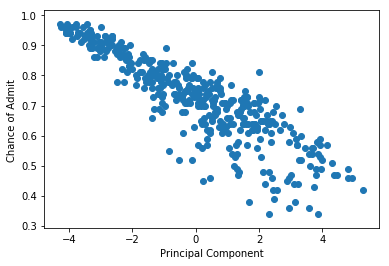

In [72]:
#Plotting the dataset
plt.xlabel("Principal Component")
plt.ylabel("Chance of Admit ")
plt.scatter(X,y)

In [73]:
#Splitting the data into tranning and test set (70-30 split)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30)

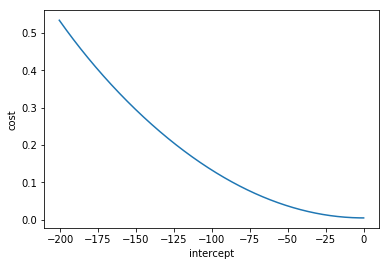

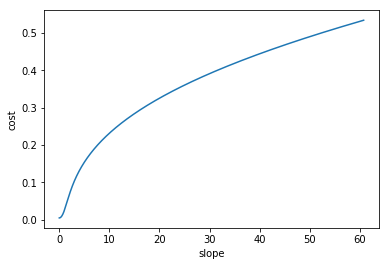

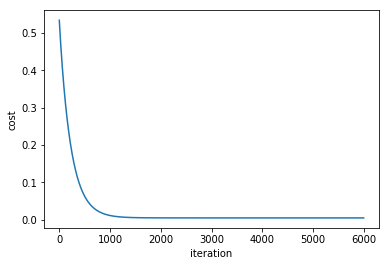

In [74]:
slope = 0
intercept = 0

iteration = 6000
learning_rate = 0.0011

l1 = list()
l2 = list()
l3 = list()
l4 = list()
m = len(X_train)

#Gradient Descent on training set
for i in range(iteration):
    y_pred_train = intercept + slope * X_train
    
    cost = (1/m) * sum(val**2 for val in (y_pred_train-y_train))
    theta1 = sum(X_train*(y_pred_train-y_train)) #calculating slope
    theta0 = sum(y_pred_train-y_train) #calculating intercept
    
    #updating slope and intercept simuntaneously
    slope = slope - learning_rate * theta1 * (2/m)
    intercept = intercept - learning_rate * theta0 * (2/m)
    
    #print(cost, theta0, theta1)
    l1.append(cost)
    l2.append(theta0)
    l3.append(theta1)
    l4.append(i)

#Plotting the cost curves
plt.xlabel("intercept")
plt.ylabel("cost")
plt.plot(l2,l1)
plt.show()

plt.xlabel("slope")
plt.ylabel("cost")
plt.plot(l3,l1)
plt.show()

plt.ylabel("cost")
plt.xlabel("iteration")
plt.plot(l4,l1)
plt.show()

#predicting the y values from the equation of line obtained by gradient descent algorithm
y_pred_train = intercept + slope*X_train
y_pred_test = intercept + slope*X_test

In [75]:
#Finding accuracy by calculating variance of the model built from scratch
from statistics import mean
accuracy = mean(val**2 for val in (y_test - y_pred_test))
print("Accuracy: ",accuracy)

Accuracy:  0.004185295424821796


In [76]:
#importing Linear Regression Model to find the best fit line on training set
from sklearn.linear_model import LinearRegression
X_plot = X_train.values.reshape(-1,1)
y_plot = y_train.values.reshape(-1,1)
X_plot_test = X_test.values.reshape(-1,1)
y_plot_test = y_test.values.reshape(-1,1)

reg = LinearRegression()
reg.fit(X_plot, y_plot)
y_pred_test = reg.predict(X_plot_test)

In [77]:
#Finding accuracy of Linear Regression Model
accur_diff = (y_plot_test-y_pred_test)**2
s = 0
for i in range(len(accur_diff)):
    s  = s + accur_diff[i]
accurancy = s / len(accur_diff)
print("Accuracy (Using Existing Model):",accuracy)

Accuracy (Using Existing Model): 0.004185295424821796


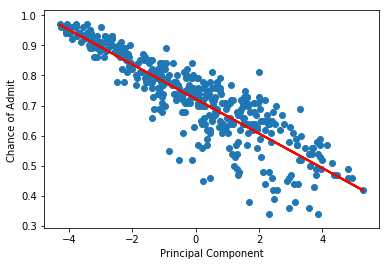

In [78]:
#plotting the data and the best fit line obtained by both the methods
Y_pred_actual = reg.coef_[0][0] * X + reg.intercept_[0]
Y_pred_scratch = slope * X + intercept
plt.scatter(X,y)
plt.xlabel("Principal Component")
plt.ylabel("Chance of Admit ")
plt.plot(X,Y_pred_actual,c='green',linewidth=2)
plt.plot(X,Y_pred_scratch,c='red',linewidth=2)

In [79]:
#Displaying the equation of line obtained by both methods
print("The Actual linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))
print("The Predicted linear model is: Y = {:.5} + {:.5}X".format(intercept, slope))

The Actual linear model is: Y = 0.72186 + -0.05745X
The Predicted linear model is: Y = 0.72186 + -0.05745X
